In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use("dark_background")

In [2]:
base_dir = "d:\soundofai\\all_nsynth_audio"
df = pd.read_csv("fb_ratios.csv", index_col=0)
df.head()

,file,pitch,fb_thin_ratio,fb_thin_band_amp,fb_thin_total_amp,fb_hollow_ratio,fb_hollow_band_amp,fb_hollow_total_amp,fb_dark_ratio,fb_dark_band_amp,...,fb_honky_total_amp,fb_harsh_ratio,fb_harsh_band_amp,fb_harsh_total_amp,fb_tinny_ratio,fb_tinny_band_amp,fb_tinny_total_amp,fb_sibilance_ratio,fb_sibilance_band_amp,fb_sibilance_total_amp
0,guitar_acoustic_000-036-025.wav,36,0.420316,4.172719,9.927567,0.647367,6.426776,9.927567,0.209906,2.083859,...,9.927567,0.304820,3.026122,9.927567,0.079756,0.791785,9.927567,0.133536,1.325691,9.927567
1,guitar_acoustic_000-036-050.wav,36,0.377758,2.180780,5.772957,0.646514,3.732295,5.772957,0.208686,1.204737,...,5.772957,0.305475,1.763495,5.772957,0.081487,0.470422,5.772957,0.132277,0.763627,5.772957
2,guitar_acoustic_000-036-075.wav,36,0.321677,4.034044,12.540665,0.661868,8.300266,12.540665,0.218304,2.737671,...,12.540665,0.346894,4.350280,12.540665,0.112690,1.413210,12.540665,0.136517,1.712018,12.540665
3,guitar_acoustic_000-036-100.wav,36,0.380922,3.230567,8.480923,0.692726,5.874956,8.480923,0.182316,1.546211,...,8.480923,0.304693,2.584075,8.480923,0.106068,0.899552,8.480923,0.091420,0.775326,8.480923
4,guitar_acoustic_000-036-127.wav,36,0.343580,2.585386,7.524832,0.649302,4.885886,7.524832,0.220241,1.657278,...,7.524832,0.350031,2.633927,7.524832,0.114407,0.860891,7.524832,0.128810,0.969275,7.524832


In [3]:
qualities = df.columns.values.tolist()
del qualities[qualities.index("file")]
del qualities[qualities.index("pitch")]
categorical = dict((k, []) for k in qualities)

In [4]:
import json
import os

with open("d:/soundofai/nsynth-guitar-subset/train/examples.json", "r") as f:
    nsynth_train = json.load(f)

with open("d:/soundofai/nsynth-guitar-subset/valid/examples.json", "r") as f:
    nsynth_valid = json.load(f)

with open("d:/soundofai/nsynth-guitar-subset/test/examples.json", "r") as f:
    nsynth_test = json.load(f)

In [5]:
get_key = lambda x: os.path.splitext(x)[0]

In [6]:
nsynth_qualities = []

for key, value in nsynth_train.items():
    qs = value["qualities_str"]
    for q in qs:
        if q not in nsynth_qualities:
            nsynth_qualities.append(q)

In [7]:
nsynth_qualities

['percussive',
 'fast_decay',
 'distortion',
 'bright',
 'nonlinear_env',
 'dark',
 'reverb',
 'long_release',
 'multiphonic',
 'tempo-synced']

In [8]:
count = len(df)

for q in nsynth_qualities:
    df[q] = [0]*count

In [9]:
for i, row in df.iterrows():
    key = get_key(row["file"])
    if key in nsynth_train:
        nsynth_qs = nsynth_train[key]["qualities_str"]
    elif key in nsynth_valid:
        nsynth_qs = nsynth_valid[key]["qualities_str"]
    elif key in nsynth_test:
        nsynth_qs = nsynth_test[key]["qualities_str"]
    else:
        nsynth_qs = []
    
    for q in nsynth_qs:
        df.loc[i, q] = 1

In [10]:
qualities

['fb_thin_ratio',
 'fb_thin_band_amp',
 'fb_thin_total_amp',
 'fb_hollow_ratio',
 'fb_hollow_band_amp',
 'fb_hollow_total_amp',
 'fb_dark_ratio',
 'fb_dark_band_amp',
 'fb_dark_total_amp',
 'fb_warm_ratio',
 'fb_warm_band_amp',
 'fb_warm_total_amp',
 'fb_full_ratio',
 'fb_full_band_amp',
 'fb_full_total_amp',
 'fb_bright_ratio',
 'fb_bright_band_amp',
 'fb_bright_total_amp',
 'fb_muddy_ratio',
 'fb_muddy_band_amp',
 'fb_muddy_total_amp',
 'fb_boxy_ratio',
 'fb_boxy_band_amp',
 'fb_boxy_total_amp',
 'fb_honky_ratio',
 'fb_honky_band_amp',
 'fb_honky_total_amp',
 'fb_harsh_ratio',
 'fb_harsh_band_amp',
 'fb_harsh_total_amp',
 'fb_tinny_ratio',
 'fb_tinny_band_amp',
 'fb_tinny_total_amp',
 'fb_sibilance_ratio',
 'fb_sibilance_band_amp',
 'fb_sibilance_total_amp']

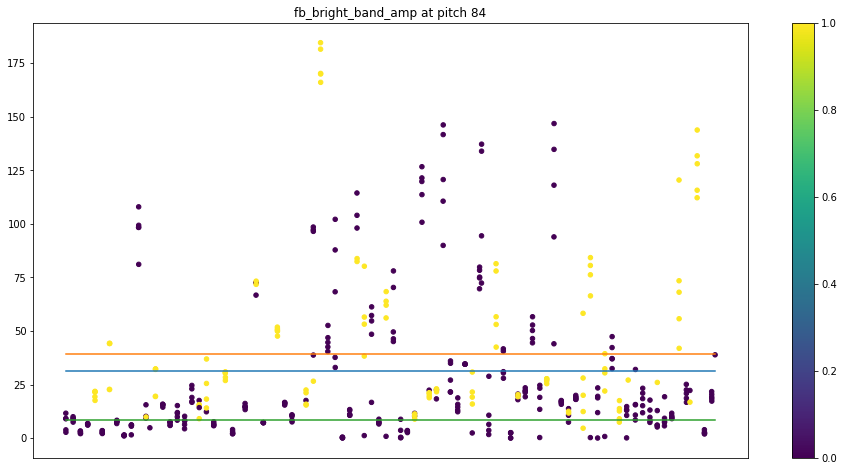

31.24030001255499 39.26925277709961 8.34316873550415


In [23]:
q = qualities[16]
p = 84
nsq = "bright"

pitch_slice = True

if pitch_slice:
    s = df[df["pitch"] == p]
else:
    s = df
mean = s.mean()[q]
std = s.std()[q]
high = s.describe()[q]["75%"]
low = s.describe()[q]["25%"]

plt.figure(figsize=(16, 8))
if pitch_slice:
    plt.scatter(x=s.index, y=s[q], s=20, c=s[nsq])
else:
    plt.scatter(x=s.index, y=s[q], s=10, c=s[nsq])
plt.plot(s.index, [mean] * len(s))
plt.plot(s.index, [high] * len(s))
plt.plot(s.index, [low] * len(s))
plt.xticks([])
if pitch_slice:
    plt.title(f"{q} at pitch {p}")
else:
    plt.title(q)
plt.colorbar()
plt.show()

print(mean, high, low)

Attempt to find an automated approach -

* Find high thres (75%), low thres (25%) for each fb_quality at each pitch
* Create categorical values based on above
* Validate categories by randomly selecting samples, their labels and verifying with human evaluation
* Train classifiers using above with weighted onlien training

In [26]:
fbq_stats = {
    "pitch": [],
    "fbq": [],
    "high": [],
    "low": []
}


for q in qualities:
    if "ratio" in q:
        for p in range(36, 85):
            s = df[df["pitch"] == p]
            high = s.describe()[q]["75%"]
            low = s.describe()[q]["25%"]
            
            fbq_stats["pitch"].append(p)
            fbq_stats["fbq"].append(q)
            fbq_stats["high"].append(high)
            fbq_stats["low"].append(low)

In [27]:
fbq_df = pd.DataFrame(fbq_stats)
fbq_df.head()

,pitch,fbq,high,low
0,36,fb_thin_ratio,0.497678,0.343088
1,37,fb_thin_ratio,0.497880,0.343626
2,38,fb_thin_ratio,0.489702,0.349344
3,39,fb_thin_ratio,0.495302,0.289731
4,40,fb_thin_ratio,0.488460,0.305299


In [28]:
fbq_df.to_csv("fbq_stats.csv", index=None)

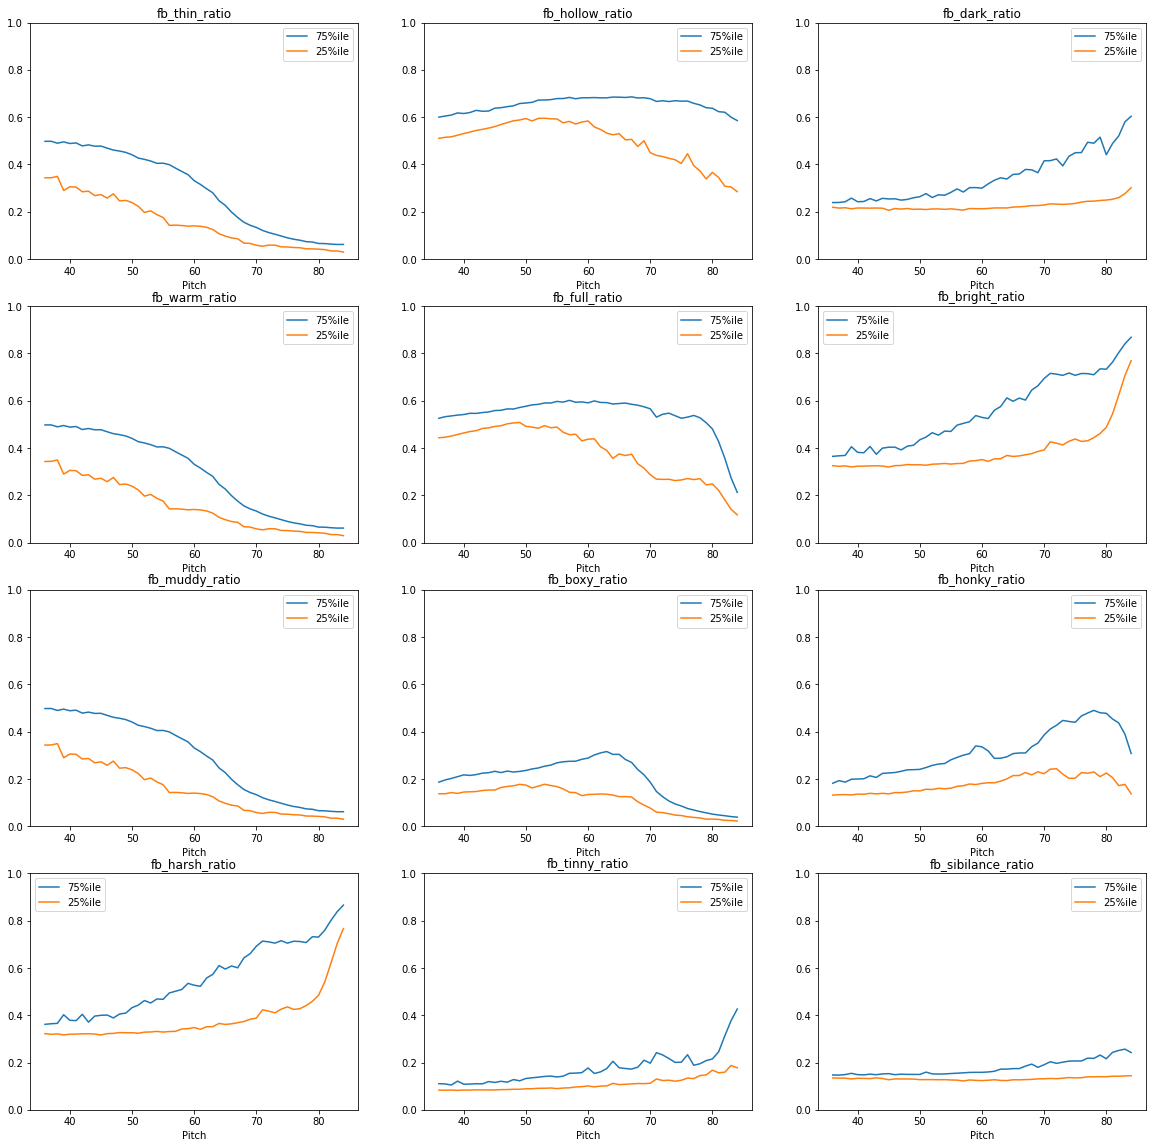

In [41]:
plt.figure(figsize=(20, 20))

count = 0

for q in qualities:
    if "ratio" in q:
        s = fbq_df[fbq_df["fbq"] == q]
        
        plt.subplot(4, 3, count + 1)
        plt.plot(s["pitch"], s["high"], label="75%ile")
        plt.plot(s["pitch"], s["low"], label="25%ile")
        plt.ylim([0, 1])
        plt.legend()
        plt.title(q)
        plt.xlabel("Pitch")
        count += 1
plt.show()